# **Chicago Crime Time Series**

_John Andrew Dixon_

---

##### **Imports**

In [140]:
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import pandas as pd

##### **Data Load**

In [141]:
# Get the list of crime files from "./Data/Chicago/"
crime_files = sorted(glob.glob("./Data/Chicago/*.csv"))
# Create one DataFrame from all the files
original_df = pd.concat([pd.read_csv(crime_file) for crime_file in crime_files])
# Add a full crime description
original_df["Full Crime"] = original_df["Primary Type"] + " " + original_df["Description"]

In [142]:
# Specify the datetime format
date_format = "%m/%d/%Y %I:%M:%S %p"
# Creat the Datetime column and make the date column into a datetime column
original_df["Datetime"] = pd.to_datetime(original_df["Date"], format=date_format)
# Change the index of the DataFrame to the Date
original_df = original_df.set_index("Datetime")

# Verify it all worked
original_df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Full Crime
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1310288,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,621,6.0,NaN,41.756650,-87.641608,CRIMINAL DAMAGE TO PROPERTY
2001-01-01 01:00:00,1311626,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.0,NaN,41.848786,-87.704087,CRIMINAL DAMAGE TO VEHICLE
2001-01-01 01:00:00,1310824,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,323,3.0,NaN,41.765484,-87.621836,THEFT $500 AND UNDER
2001-01-01 13:00:00,6154338,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.0,15.0,41.774819,-87.702896,THEFT FINANCIAL ID THEFT: OVER $300
2001-01-01 01:00:00,3206463,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,835,8.0,18.0,41.735507,-87.690095,CRIM SEXUAL ASSAULT PREDATORY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-30 12:48:00,13091787,05/30/2023 12:48:00 PM,THEFT,RETAIL THEFT,DRUG STORE,False,False,1733,17.0,33.0,41.953925,-87.707307,THEFT RETAIL THEFT
2023-05-30 12:50:00,13090302,05/30/2023 12:50:00 PM,CRIMINAL DAMAGE,TO VEHICLE,RESIDENCE,False,False,522,5.0,9.0,41.677237,-87.623871,CRIMINAL DAMAGE TO VEHICLE
2023-05-30 00:52:00,13089754,05/30/2023 12:52:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CONVENIENCE STORE,False,False,2511,25.0,36.0,41.938194,-87.793558,CRIMINAL DAMAGE TO PROPERTY


---

## **Stakeholder Questions**

### **Comparing Police Districts:**

#### _Which district has the most crimes? Which has the least?_

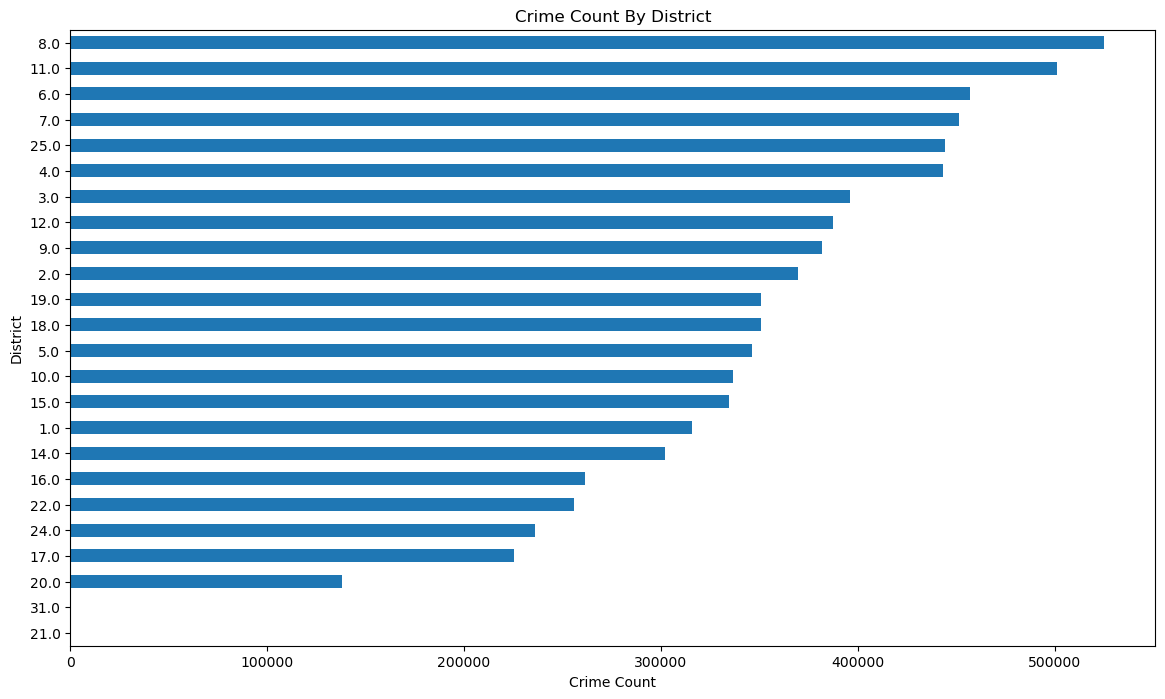

In [143]:
# Plot the crime count by district, add a title and labels for each axis
ax = original_df["District"].value_counts().sort_values().plot(kind="barh",
                                                               title="Crime Count By District",
                                                               xlabel="Crime Count",
                                                               ylabel="District",
                                                               figsize=(14, 8));

District 8 has, undoubtedly, the most amount of crime. But, it's harder to find the district with the least amount of crime since. This is because district 21, according to our data, has the least amount of crime but according to the websites below, there is no district 21 (since it is not listed anywhere):
- https://gis.chicagopolice.org/pages/cpd-pdf-maps
- https://data.cityofchicago.org/Public-Safety/Boundaries-Police-Districts-current-/fthy-xz3r
- https://www.chicago.gov/city/en/depts/cpd.html

Going further, by analyzing the crimes located in district 21 from the data we can see something odd about these crimes:

In [144]:
# Display only crimes from district 21
original_df.loc[original_df["District"] == 21, :]

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Full Crime
Datetime,,,,,,,,,,,,,
2003-07-20 00:05:00,2841856,07/20/2003 12:05:00 AM,THEFT,FROM BUILDING,OTHER,False,False,2112,21.0,3.0,41.837901,-87.621915,THEFT FROM BUILDING
2004-02-18 18:15:00,3184687,02/18/2004 06:15:00 PM,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,2112,21.0,3.0,41.837901,-87.621915,BATTERY AGGRAVATED:KNIFE/CUTTING INSTR
2004-07-04 15:45:48,3425216,07/04/2004 03:45:48 PM,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,2112,21.0,3.0,41.837901,-87.621915,NARCOTICS POSS: HEROIN(WHITE)
2004-08-01 20:05:00,3465922,08/01/2004 08:05:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,VEHICLE NON-COMMERCIAL,True,True,2112,21.0,3.0,41.837901,-87.621915,BATTERY DOMESTIC BATTERY SIMPLE


There are only 4 total crimes in district 21 and all happen within 13 months of each other (07/2003-08/2004). One would expect there to be more crimes across all the years if this district existed. But there isn't. So, I will say that district 21 can be ignored since it is possibly erroneous. 

District 31 is the next district that has the least amount of crimes. We'll check it for oddities too since it seems to have a small amount of crime compared to the other districts in the plot above. Notably, we'll be searching for recent crimes to prove to us that this district actually exists and is in use:

In [7]:
# Display only crimes from district 31
original_df.loc[original_df["District"] == 31, :]

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Full Crime
Datetime,,,,,,,,,,,,,
2002-01-25 17:17:00,1999690,01/25/2002 05:17:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1621,31.0,NaN,42.007037,-87.761712,OTHER OFFENSE HARASSMENT BY TELEPHONE
2002-03-02 01:00:00,2013371,03/02/2002 01:00:00 AM,THEFT,OVER $500,BAR OR TAVERN,False,False,533,31.0,NaN,41.646187,-87.617227,THEFT OVER $500
2002-03-06 19:30:00,2019929,03/06/2002 07:30:00 PM,BURGLARY,FORCIBLE ENTRY,FACTORY/MANUFACTURING BUILDING,False,False,1651,31.0,NaN,41.973534,-87.866809,BURGLARY FORCIBLE ENTRY
2002-04-04 13:00:00,2064064,04/04/2002 01:00:00 PM,THEFT,$500 AND UNDER,SIDEWALK,False,False,533,31.0,NaN,41.646187,-87.617227,THEFT $500 AND UNDER
2002-04-05 09:00:00,2066054,04/05/2002 09:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,1611,31.0,NaN,42.000241,-87.799527,THEFT $500 AND UNDER
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-11 17:00:00,12956274,01/11/2023 05:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,GAS STATION,False,False,1654,31.0,41.0,42.003002,-87.894202,MOTOR VEHICLE THEFT AUTOMOBILE
2023-01-11 10:50:00,12950142,01/11/2023 10:50:00 AM,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1654,31.0,41.0,42.008962,-87.906491,ASSAULT SIMPLE
2023-02-07 17:30:00,13077041,02/07/2023 05:30:00 PM,BATTERY,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1654,31.0,41.0,42.008962,-87.906473,BATTERY SIMPLE


The crimes that happened within this district range from 2002 to 2023. Based on this, I conclude that this district is real and thus has the least amount of crime.

> **Result**:
> - District 8: Has the most crime.
> - District 31: Has the least crime.
>
> _**Note:** Based upon comparing maps, I believe the crimes in district 21 happened in district 2 based on the latitude and longitude given. But, this is just conjecture._

### **Crimes Across the Years:**

#### _Is the total number of crimes increasing or decreasing across the years?_

> _**Note**: For this part, I will exclude 2023 since the year hasn't ended yet and it can potentially skew the data._

In [117]:
# Make a copy of the original dataframe
year_df = original_df.copy()
# Add a year column to it for easy binning
year_df["Year"] = year_df.index.year
# Verify it worked
year_df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Full Crime,Year
Datetime,,,,,,,,,,,,,,
2001-01-01 01:00:00,1310288,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,621,6.0,NaN,41.756650,-87.641608,CRIMINAL DAMAGE TO PROPERTY,2001
2001-01-01 01:00:00,1311626,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.0,NaN,41.848786,-87.704087,CRIMINAL DAMAGE TO VEHICLE,2001
2001-01-01 01:00:00,1310824,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,323,3.0,NaN,41.765484,-87.621836,THEFT $500 AND UNDER,2001
2001-01-01 13:00:00,6154338,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.0,15.0,41.774819,-87.702896,THEFT FINANCIAL ID THEFT: OVER $300,2001
2001-01-01 01:00:00,3206463,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,835,8.0,18.0,41.735507,-87.690095,CRIM SEXUAL ASSAULT PREDATORY,2001


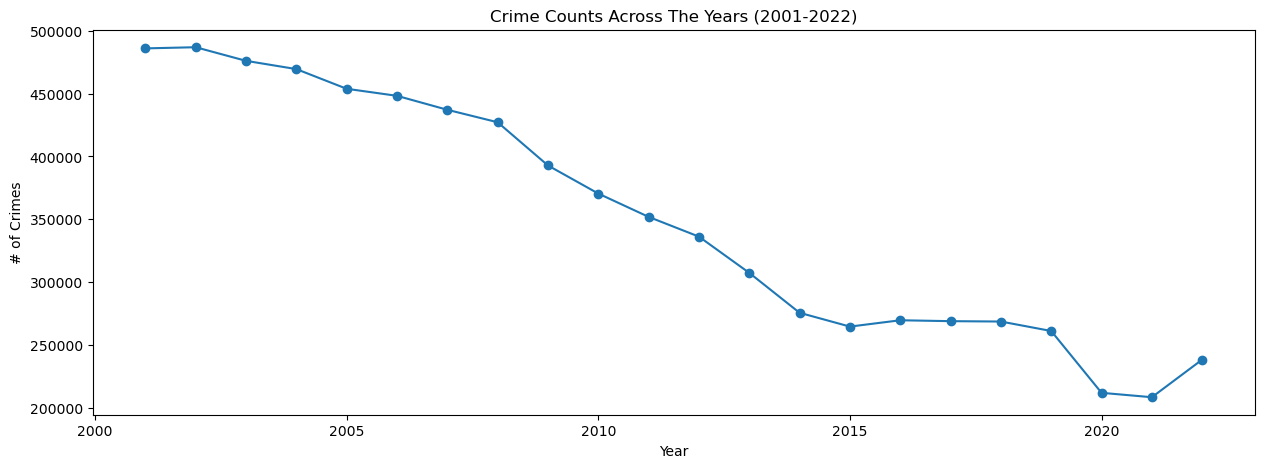

In [145]:
# Plot the crime count across the years, add a title and labels for each axis
year_df["Year"].value_counts().sort_index().iloc[:-1].plot(style='o-',
                                                           title="Crime Counts Across The Years (2001-2022)",
                                                           ylabel='# of Crimes', 
                                                           xlabel='Year', 
                                                           figsize=(15, 5));

> Result:
> - Across the years crime counts are generally decreasing.

#### _Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?_


In [120]:
# Get the crimes by year
crimes_by_year = year_df.groupby("Year")["Primary Type"].value_counts()
# Unstack the first level for easier access and transpose so that way the year is the index
crimes_by_year = pd.DataFrame(crimes_by_year).unstack(level = 0).T
# Replace the index with the years for easier access
crimes_by_year.set_index(crimes_by_year.index.get_level_values(1), inplace=True)
# Fill all NaNs with 0
crimes_by_year.fillna(0, inplace=True)
# Verify
crimes_by_year.head()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Year,,,,,,,,,,,,,,,,,,,,,
2001,1011.0,31384.0,93460.0,26014.0,1.0,1779.0,55858.0,30.0,13241.0,14946.0,...,29663.0,6026.0,9.0,2750.0,8.0,18441.0,2239.0,204.0,99277.0,4277.0
2002,1032.0,31523.0,94153.0,25623.0,0.0,1807.0,55941.0,27.0,13880.0,13731.0,...,32600.0,6408.0,8.0,2457.0,2.0,18523.0,2173.0,200.0,98332.0,4281.0
2003,955.0,29477.0,88379.0,25157.0,0.0,1571.0,55011.0,40.0,14807.0,13459.0,...,31147.0,6214.0,6.0,2430.0,2.0,17332.0,2078.0,247.0,98876.0,4211.0
2004,778.0,28850.0,87136.0,24564.0,0.0,1539.0,53164.0,40.0,15913.0,13255.0,...,29532.0,7476.0,9.0,2495.0,1.0,15978.0,1805.0,215.0,95463.0,4298.0
2005,691.0,27067.0,83964.0,25503.0,0.0,1522.0,54548.0,36.0,16655.0,13590.0,...,28028.0,6124.0,4.0,2730.0,2.0,16047.0,1816.0,192.0,85684.0,4106.0


> _**Note:** There are a total of 36 `Primary Type` crimes. This would be very ugly to plot. So, I will only plot those crimes that increased._

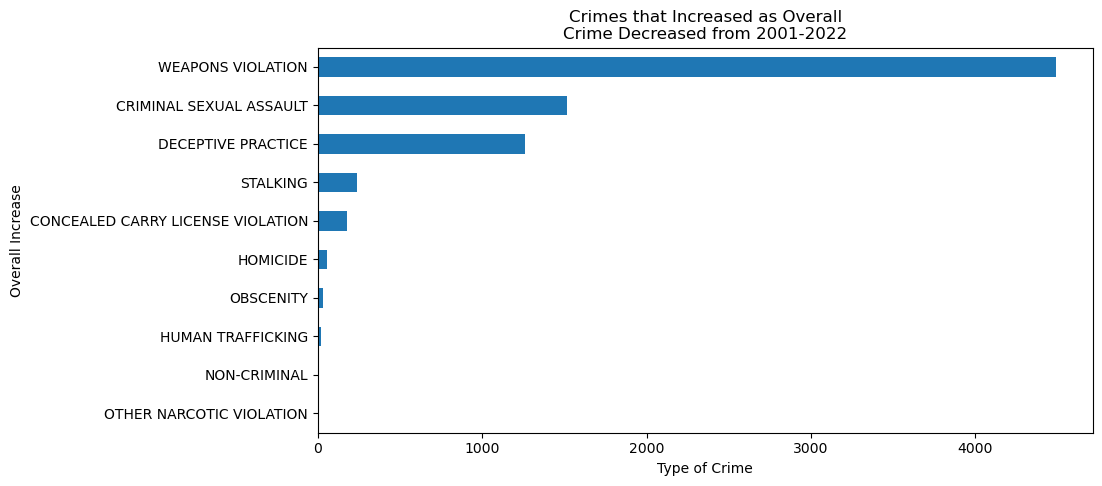

In [157]:
# Get the change in crime counts from 2022-2001 and sort the results while removing the final result which corresponds to 2023
change_in_crime = (crimes_by_year.loc[2022] - crimes_by_year.loc[2001]).sort_values(ascending=True)
change_in_crime.loc[change_in_crime > 0].plot(kind="barh",
                                              figsize=(10, 5), 
                                              title="Crimes that Increased as Overall\nCrime Decreased from 2001-2022",
                                              xlabel="Type of Crime",
                                              ylabel="Overall Increase");

> Result:
> - Only 10 out of 36 crimes are increasing while overall crime is decreasing. See the above plot for details.

### **Comparing AM vs. PM Rush Hour:**

#### _Are crimes more common during AM rush hour or PM rush hour?_

In [158]:
# Filter crimes based on time. The following helped me do this:
# https://pub.towardsai.net/how-to-filter-pandas-dataframe-by-time-81509d3adee9
# The other way to do this would be to use the following as filters:
# AM -> ((original_df.index.hour >= 7) & (original_df.index.hour <= 9)) | ((original_df.index.hour == 10) & (original_df.index.minute == 0) & (original_df.index.second == 0))
# PM -> ((original_df.index.hour >= 16) & (original_df.index.hour <= 18)) | ((original_df.index.hour == 19) & (original_df.index.minute == 0) & (original_df.index.second == 0))
# It gives the same result but is way, way uglier so I searched the web and found the above article
am_rush_df = original_df.copy().between_time("07:00", "10:00")
pm_rush_df = original_df.copy().between_time("16:00", "19:00")

# Add "Rush Hour" column to each DataFrame and label them AM or PM for easy future binning
am_rush_df.loc[:, "Rush Hour"] = "AM"
pm_rush_df.loc[:, "Rush Hour"] = "PM"

# Combine the AM/PM rush hour DataFrames into one
am_pm_rush_df = pd.concat([am_rush_df, pm_rush_df])
am_pm_rush_df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Full Crime,Rush Hour
Datetime,,,,,,,,,,,,,,
2001-01-01 07:00:00,1319849,01/01/2001 07:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,925,9.0,NaN,NaN,NaN,THEFT $500 AND UNDER,AM
2001-01-01 07:00:00,1890605,01/01/2001 07:00:00 AM,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,SMALL RETAIL STORE,False,False,2411,24.0,NaN,42.006281,-87.689954,OTHER OFFENSE HARASSMENT BY ELECTRONIC MEANS,AM
2001-01-01 07:00:00,1461383,01/01/2001 07:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,2535,25.0,NaN,41.904144,-87.724985,THEFT $500 AND UNDER,AM
2001-01-01 07:00:00,1312745,01/01/2001 07:00:00 AM,BURGLARY,UNLAWFUL ENTRY,CHA APARTMENT,False,False,1333,12.0,NaN,41.883291,-87.674366,BURGLARY UNLAWFUL ENTRY,AM
2001-01-01 07:00:00,1352406,01/01/2001 07:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1623,16.0,NaN,41.968067,-87.753471,OTHER OFFENSE HARASSMENT BY TELEPHONE,AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-30 19:00:00,13092447,05/30/2023 07:00:00 PM,THEFT,OVER $500,STREET,False,False,1612,16.0,41.0,41.983082,-87.802124,THEFT OVER $500,PM
2023-05-30 19:00:00,13091343,05/30/2023 07:00:00 PM,THEFT,OVER $500,APARTMENT,False,False,211,2.0,4.0,41.838385,-87.620314,THEFT OVER $500,PM
2023-05-30 19:00:00,13091068,05/30/2023 07:00:00 PM,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,124,1.0,28.0,41.868573,-87.640762,MOTOR VEHICLE THEFT ATTEMPT - AUTOMOBILE,PM


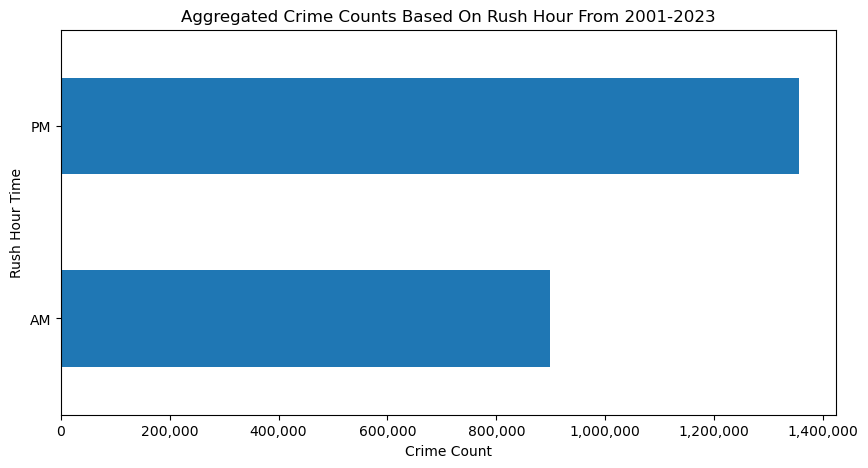

In [114]:
# Create the plot
ax = am_pm_rush_df["Rush Hour"].value_counts().sort_index().plot(kind="barh", figsize=(10, 5))

# Format the title and labels
ax.set_title("Crime Counts Based On Rush Hour From 2001-2023")
ax.set_xlabel("Crime Count")
ax.set_ylabel("Rush Hour Time")

# Format the x-tick labels
crime_cnt_format = mticks.StrMethodFormatter("{x:,.0f}")
ax.xaxis.set_major_formatter(crime_cnt_format);

> **Result:**
> - Crimes are more common during the PM rush hour.

#### _What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?_

> _**Note:** I will use `Full Crime` column which combine two other columns to pinpoint the exact crime that occurred. This is more accurate._

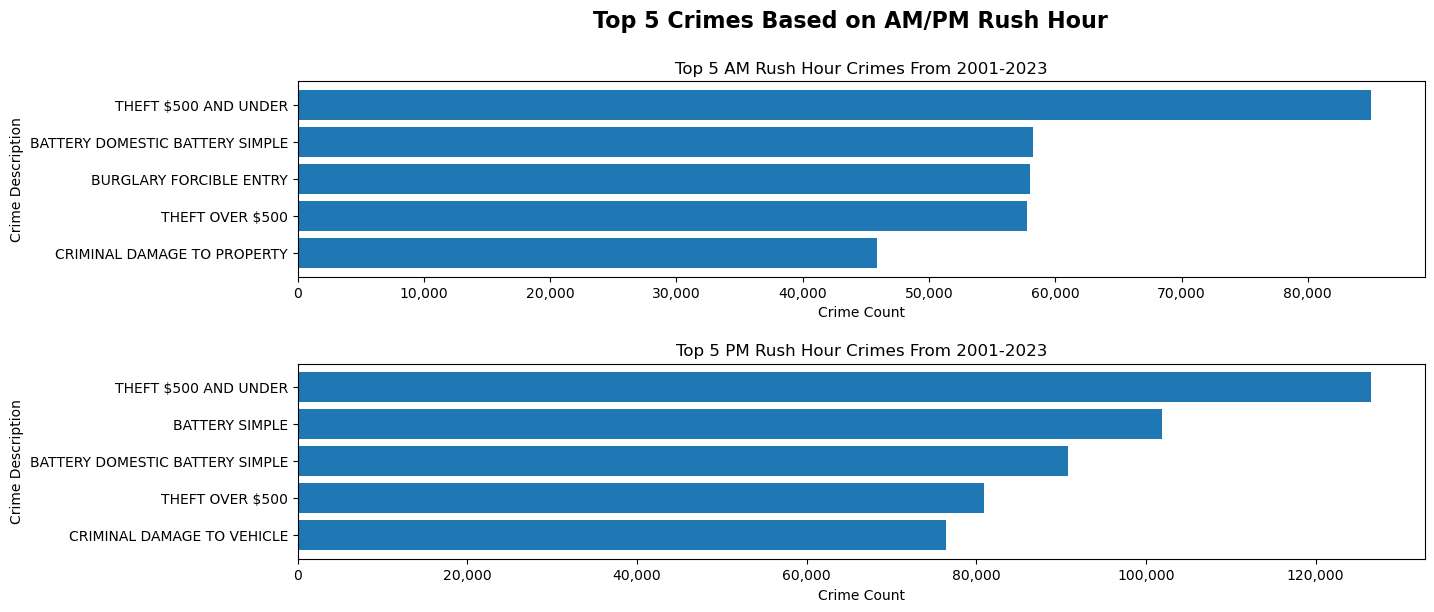

In [115]:
# Get the top 5 crimes for AM and PM rush hours
am = am_rush_df["Full Crime"].value_counts().sort_values(ascending=True).tail()
pm = pm_rush_df["Full Crime"].value_counts().sort_values(ascending=True).tail()
# Create a string formatted for axis ticks
crime_cnt_format = mticks.StrMethodFormatter("{x:,.0f}")

# Create the subplot layout
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

# Fix the layout so it won't be so cramped
fig.tight_layout(h_pad=5)
plt.subplots_adjust(top=0.86)

# Create a super title for the plots
fig.suptitle("Top 5 Crimes Based on AM/PM Rush Hour", fontsize=16, fontweight="bold")

# Plot the AM bar subplot
ax[0].barh(am.index, am.values)
# Set the title and axes labels
ax[0].set_title("Top 5 AM Rush Hour Crimes From 2001-2023")
ax[0].set_xlabel("Crime Count")
ax[0].set_ylabel("Crime Description")
# Format the x-axis ticks
ax[0].xaxis.set_major_formatter(crime_cnt_format)

# Plot the PM bar subplot
ax[1].barh(pm.index, pm.values)
# Set the title and axes labels
ax[1].set_title("Top 5 PM Rush Hour Crimes From 2001-2023")
ax[1].set_xlabel("Crime Count")
ax[1].set_ylabel("Crime Description")
# Format the x-axis ticks
ax[1].xaxis.set_major_formatter(crime_cnt_format)

> **Result:**
> - See above. It is worth noting that the crimes in the AM rush hour are near the same as those in the PM rush hour. The differences are as such:
>    - AM rush hour has `Burglary Forcible Entry` and `Criminal Damage To Property` whereas PM rush hour has `Battery Simple` and `Criminal Damage To Vehicle`.
>    - There are differences in rank of crimes which can be readily seen above.

#### _Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?_

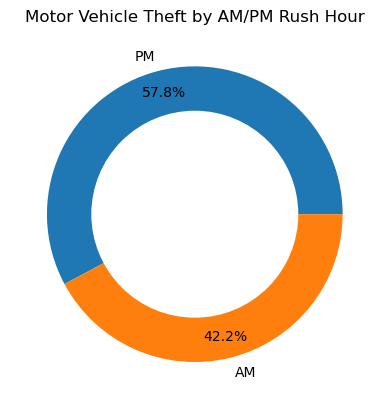

In [162]:
# Get rows for "MOTOR VEHICLE THEFT" crimes and only get the column that says whether the crime
# is AM or PM rush hour. Then, get the value counts for the donut chart below 
motor_vehice_theft_df = am_pm_rush_df.loc[am_pm_rush_df["Primary Type"] == "MOTOR VEHICLE THEFT", "Rush Hour"].value_counts()

# Plot the pie chart
plt.pie(motor_vehice_theft_df, labels=motor_vehice_theft_df.index, autopct='%1.1f%%', pctdistance=0.85)

# Create a white circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
# Get the current figure and save it as fig
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle);

# Add a good title
plt.title('Motor Vehicle Theft by AM/PM Rush Hour');

> Result:
> - Motor Vehicle Thefts more common during the PM rush hour than the AM Rush Hour.